# Teste da Estratégia Aprimorada V2
Notebook para testar a nova implementação da estratégia de mini dólar

In [6]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from src.agents.coordinator import StrategyCoordinator
from src.reporting.performance import PerformanceAnalyzer

In [7]:
# Configurar a estratégia
coordinator = StrategyCoordinator(
    initial_balance=100000,
    max_position=1,
    stop_loss=150,
    take_profit=300,
    db_path="../src/data/database/candles.db",
    strategy_params={
        'session_times': {
            'morning_start': '09:00',
            'morning_end': '11:00',
            'afternoon_start': '14:00',
            'afternoon_end': '16:00'
        },
        'gap_threshold': 0.2,
        'volume_profile_periods': 20
    }
)

INFO:src.data.loaders.market_data:Using database: c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\src\data\database\candles.db
2024-12-05 14:20:29.320 | INFO     | src.agents.market:__init__:34 - Initialized MarketAgent with balance=100000
2024-12-05 14:20:29.320 | INFO     | src.agents.coordinator:__init__:41 - Initialized StrategyCoordinator with parameters:


In [8]:
# Definir período de teste
end_date = datetime.now()
start_date = end_date - timedelta(days=60) #days=60

# Executar backtest
results = coordinator.backtest(
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d'),
    interval=5
)

2024-12-05 14:20:31.068 | INFO     | src.data.loaders.market_data:get_minute_data:78 - Attempting to load data from c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\src\data\database\candles.db
2024-12-05 14:20:31.070 | INFO     | src.data.loaders.market_data:get_minute_data:87 - Executing query: 
        SELECT * FROM candles 
        WHERE time >= '2024-10-06' 
        AND time <= '2024-12-05' 
        ORDER BY time ASC
        
2024-12-05 14:20:31.230 | INFO     | src.data.loaders.market_data:get_minute_data:98 - Data loaded: 21087 records
2024-12-05 14:20:31.230 | INFO     | src.agents.coordinator:backtest:83 - Loaded 21087 candles for backtest


Columns before processing: ['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'volume']
Columns after processing: ['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'volume', 'rsi', 'ma_fast', 'ma_slow', 'delta', 'buying_pressure', 'selling_pressure', 'pressure_ratio', 'cum_delta', 'cum_volume', 'prev_close', 'gap_size', 'gap_type', 'session_active', 'ml_prob', 'signal', 'final_signal', 'atr', 'dynamic_stop_loss', 'stop_loss', 'take_profit', 'take_profit_level1', 'take_profit_level2', 'take_profit_level3', 'breakeven_level']


2024-12-05 14:20:52.248 | INFO     | src.agents.coordinator:backtest:91 - Completed backtest from 2024-10-06 to 2024-12-05


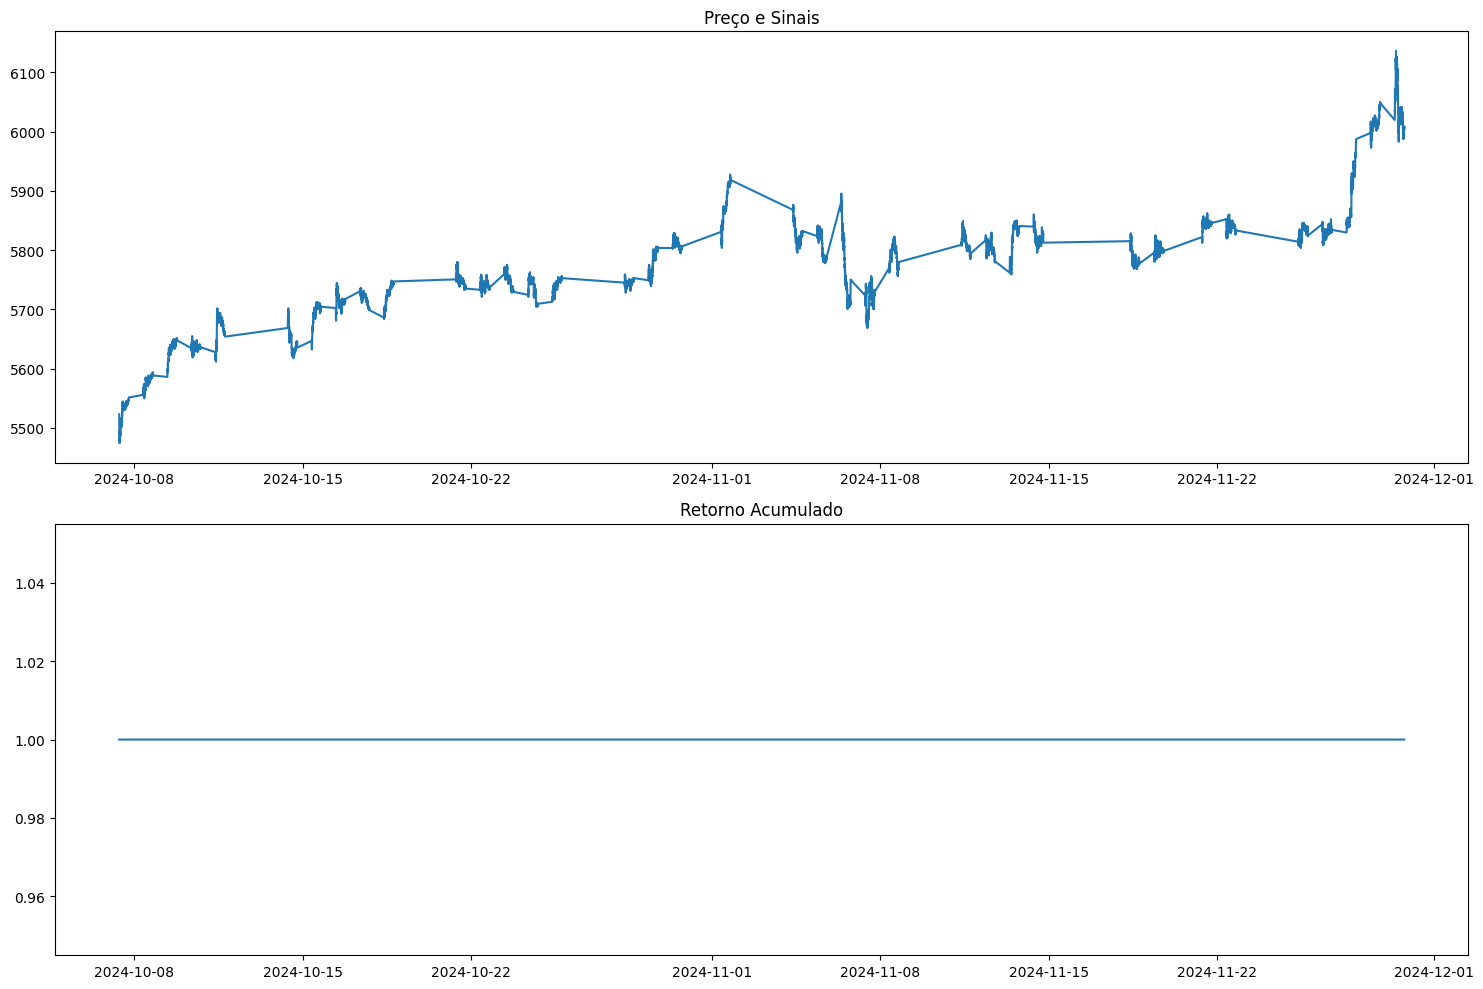

In [9]:
# Análise dos resultados
def plot_results(results):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Preço e sinais
    ax1.plot(results.index, results['close'])
    ax1.scatter(results[results['signal'] == 1].index, 
               results[results['signal'] == 1]['close'],
               color='green', marker='^')
    ax1.scatter(results[results['signal'] == -1].index,
               results[results['signal'] == -1]['close'],
               color='red', marker='v')
    ax1.set_title('Preço e Sinais')
    
    # Retorno acumulado
    ax2.plot(results.index, results['cumulative_returns'])
    ax2.set_title('Retorno Acumulado')
    
    plt.tight_layout()
    plt.show()

plot_results(results)

In [10]:
# Métricas de performance
metrics = coordinator.get_performance_metrics(results)
pd.Series(metrics)

c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\agents\market.py:159: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe = np.sqrt(252) * excess_returns.mean() / returns.std()
2024-12-05 14:21:12.282 | INFO     | src.agents.coordinator:get_performance_metrics:107 - Calculated performance metrics: {'total_trades': 0, 'win_rate': 0.0, 'total_profit': 0.0, 'max_drawdown': 0.0, 'sharpe_ratio': -inf}


total_trades    0.0
win_rate        0.0
total_profit    0.0
max_drawdown    0.0
sharpe_ratio   -inf
dtype: float64